<a href="https://colab.research.google.com/github/EltonGS/BC_DS_projeto_modulo_3/blob/main/Notebooks/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas que serão usadas
import pandas as pd # para manipulação dos dados

import matplotlib.pyplot as plt # para plotar e modificar gráficos

import seaborn as sns # para plotar gráficos

In [2]:
# endereço dos dataframes que serão utilizados

# dados de covid-19 para cidade de Santo André / SP
url_sa = 'https://raw.githubusercontent.com/EltonGS/BC_DS_projeto_modulo_3/main/dados_tratados/dados_sa.csv'

In [3]:
# lendo os arquivos csv
dados_sa = pd.read_csv(url_sa)

In [4]:
# visualizando os dados de Santo André
dados_sa.head(3)

,cidade,codigo_cidade,data,semana_epidem,populacao,populacao_2019,is_last,is_repeated,casos_confirmados,casos_por_100k_habitantes,data_atualizacao,taxa_mortalidade,obitos,estado,casos_novos,obitos_novos
0,Santo André,3547809.0,2020-03-16,202012,721368.0,718773.0,False,False,1,0.13863,2020-03-16,0.0,0,SP,1,0
1,Santo André,3547809.0,2020-03-17,202012,721368.0,718773.0,False,False,1,0.13863,2020-03-17,0.0,0,SP,0,0
2,Santo André,3547809.0,2020-03-18,202012,721368.0,718773.0,False,False,6,0.83175,2020-03-18,0.0,0,SP,5,0


In [5]:
# transformando os dados da coluna data dos dataframes no formato datetime
dados_sa['data'] = pd.to_datetime(dados_sa['data'], format='%Y-%m-%d')

In [6]:
# verificando o tipo de dado na coluna data agora com o tipo datetime
dados_sa['data'].head(3)

0   2020-03-16
1   2020-03-17
2   2020-03-18
Name: data, dtype: datetime64[ns]

Agora que temos os dados já padronizados podemos começar a visualizar os dados em alguns gráficos para tirar algumas informações.

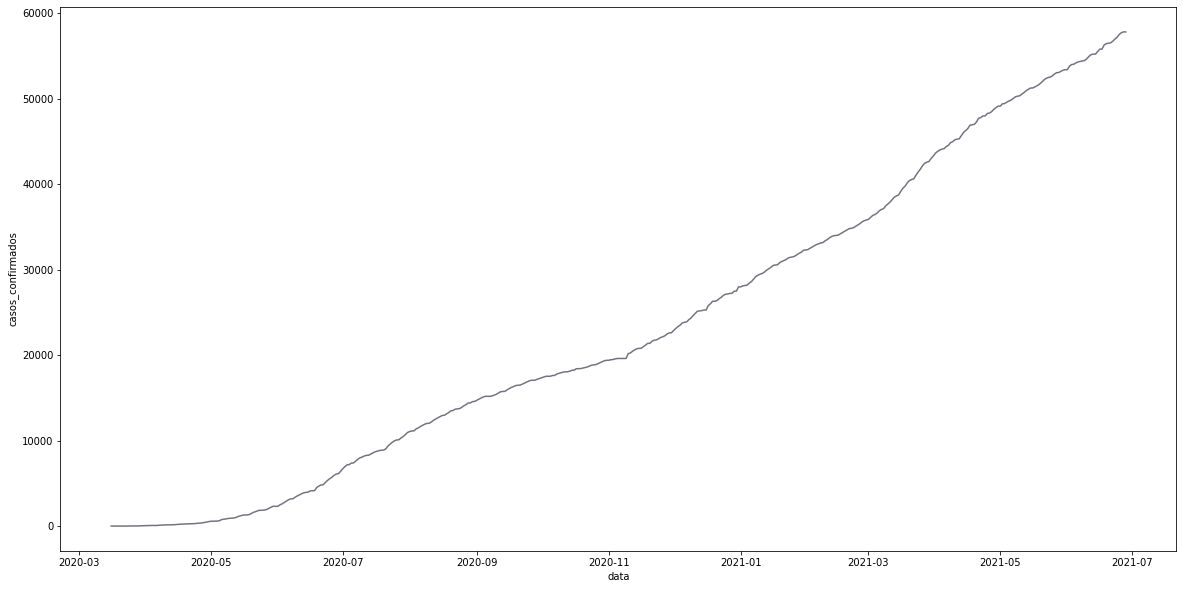

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

# plotando as curvas de casos identificados para a cidade de Santo André em comparação com o estado de SP
sns.lineplot(data=dados_sa, x=dados_sa['data'], y=dados_sa['casos_confirmados'], color='#717480')

**Gráfico 1**: Acima temos a curva de crescimento dos casos de Covid-19 para a cidade de Santo André. Podemos notar algumas características de uma **curva de crescimento exponencial**, o início com um crescimento lento e logo depois um crescimento acentuado, momentos em que a curva de crescimentos parece tender a suavizar o aumento de casos e logo em seguida um novo aumento brusco.

Para verificar se temos uma curva de crescimento exponencial é possível plotar nosso dados em um gráfico onde o eixo Y está em escala logarítmica. Ao aplicarmos uma escala logarítmica em uma curva de crescimento exponencial devemos ter uma reta.

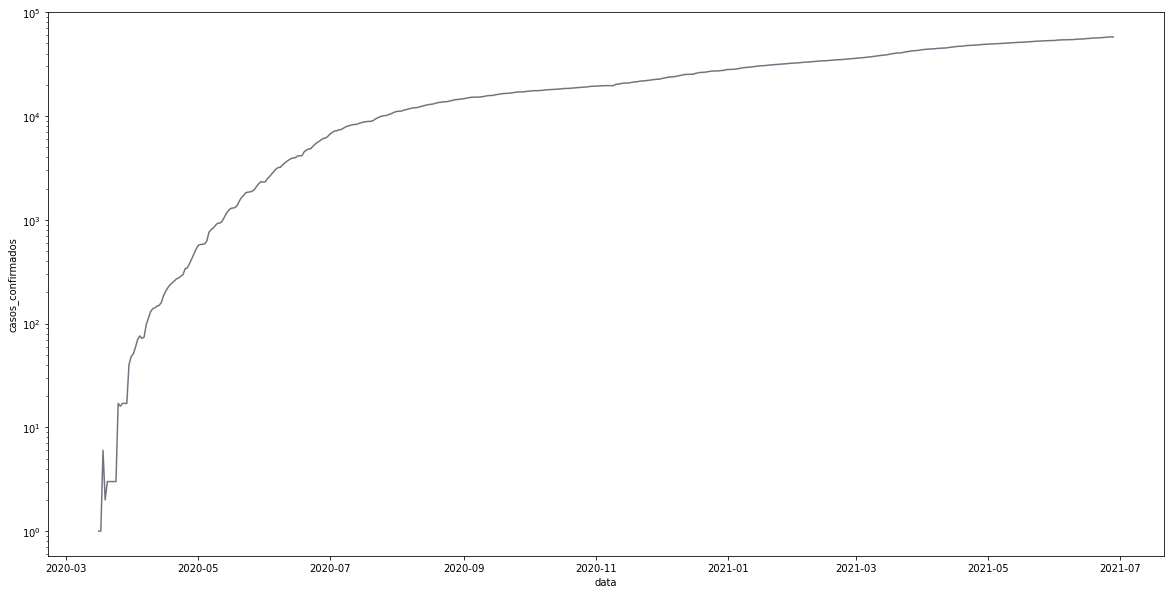

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

# plotando as curvas de casos identificados para a cidade de Santo André em comparação com o estado de SP
sns.lineplot(data=dados_sa, x=dados_sa['data'], y=dados_sa['casos_confirmados'], color='#717480')
plt.yscale('log')

**Gráfico 2**: Número de casos confirmados de Covid-19 em Santo André com **escala logarítmica**.

Nota-se que não temos uma reta perfeita no gráfico acima, onde o eixo Y está em escala logarítmica, mas podemos identificar alguns segmentos de reta. A alteração no ângulo entre esses segmentos de reta são explicados por alteração no fator exponencial ao longo do tempo. Assim, mesmo não tendo uma reta perfeita temos um crescimento exponencial identificado no gráfico.

Podemos também verificar a evolução de casos novos de Covid-19 informado ao longo dos dias.

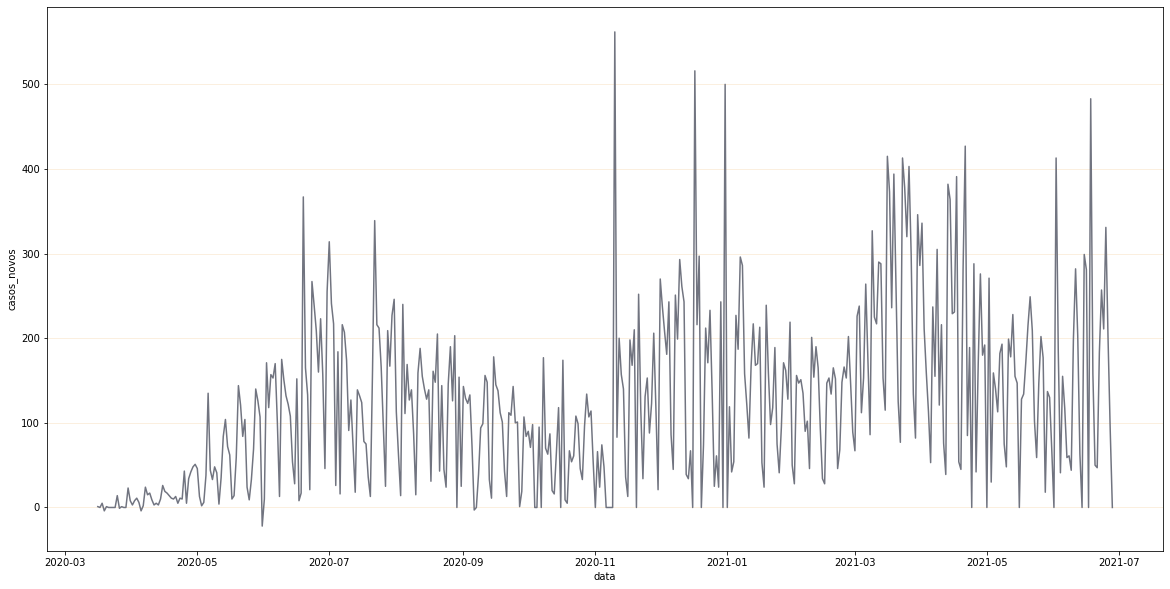

In [9]:
# criando a figura, os eixos e definindo o tamanho da figura
fig, ax = plt.subplots(figsize = (20, 10))

sns.lineplot(data = dados_sa, x = dados_sa['data'], y = dados_sa['casos_novos'], color='#717480')
plt.grid(which='major', axis='y', color='antiquewhite')

**Gráfico 3**: Casos novos de Covid-19 através dos dias.

No gráfico acima alguns valores estão abaixo de zero, negativos, isso indica uma retificação ao número de casos informados anteriormente.

Podemos identificar alguns períodos onde o número de casos diários aumenta significativamente.

Podemos calcular a taxa de crescimento do número de casos e óbitos ao longo do tempo realizando a diferenciação dos dados de casos e óbitos novos. 



In [10]:
# calculando a taxa de crescimento para os casos e óbitos atraves da diferenciação
dados_sa['taxa_crescimento_casos'] = dados_sa['casos_novos'].diff()
dados_sa['taxa_crescimento_obitos'] = dados_sa['obitos_novos'].diff()

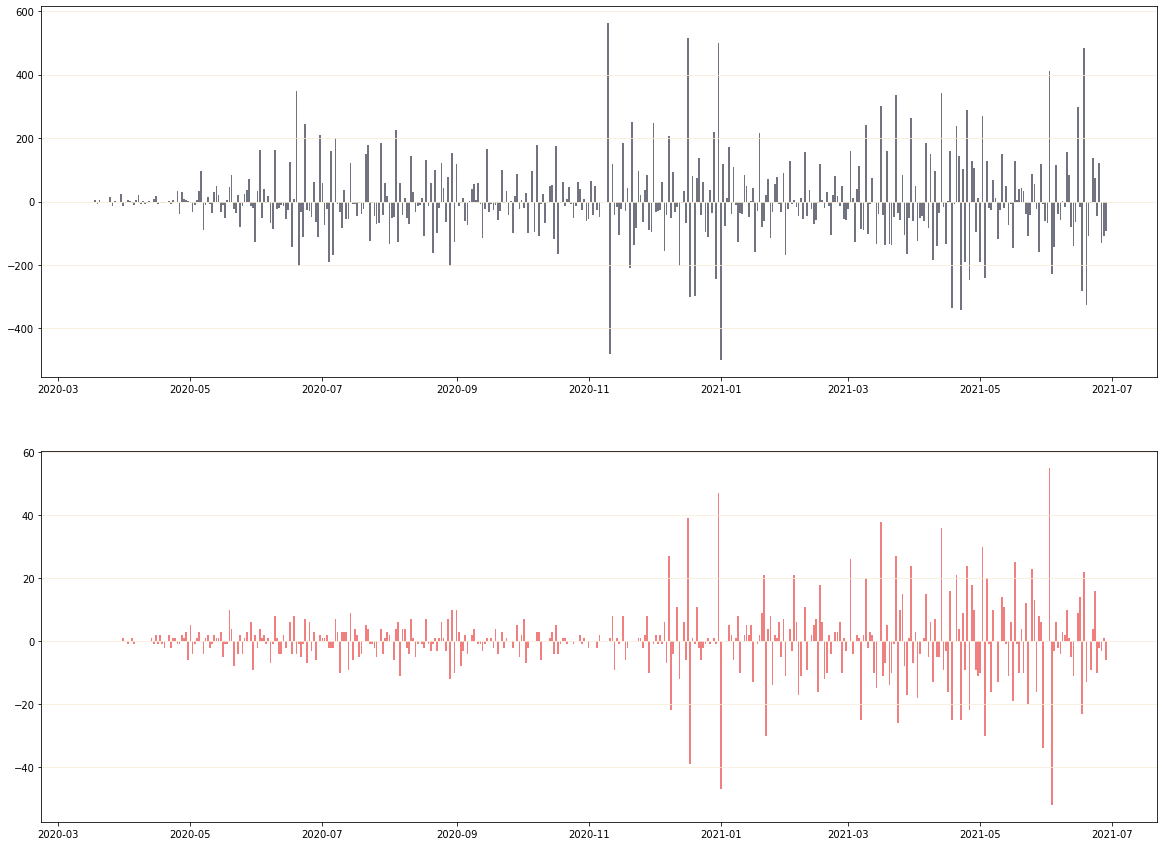

In [11]:
# plotando os gráficos com as taxas de crescimento para casos e óbitos

# criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(20, 15))

ax[0].bar(dados_sa['data'], dados_sa['taxa_crescimento_casos'], color='#717480')
ax[1].bar(dados_sa['data'], dados_sa['taxa_crescimento_obitos'], color='lightcoral')

ax[0].grid(which='major', axis='y', color='antiquewhite')
ax[1].grid(which='major', axis='y', color='antiquewhite')

**Gráfico 4**: Taxa de crescimento verificada através da diferenciação do número de casos e óbitos novos.

Atráves da visualização da diferenciação dos casos e óbitos novos podemos identificar picos, dias seguidos valores altos ou baixos, mudanças na tendência.

Com os dados de novos casos e óbitos também podemos calcular a **média móvel** para **casos** e **óbitos** ao longo do tempo. Neste projeto a **janela** da média móvel será de **7 dias**, assim como é calculada pelos orgãos oficiais em Santo André.

In [12]:
# calculando a média móvel para o número de casos e óbitos com janela de 7 dias
dados_sa['media_movel_casos'] = dados_sa['casos_novos'].rolling(window=7, center=False).mean()
dados_sa['media_movel_obitos'] = dados_sa['obitos_novos'].rolling(window=7, center=False).mean()

Com a média móvel calculada para casos e óbitos de Covid-19 podemos plotar a média sobre os gráficos com os casos e óbitos novos.

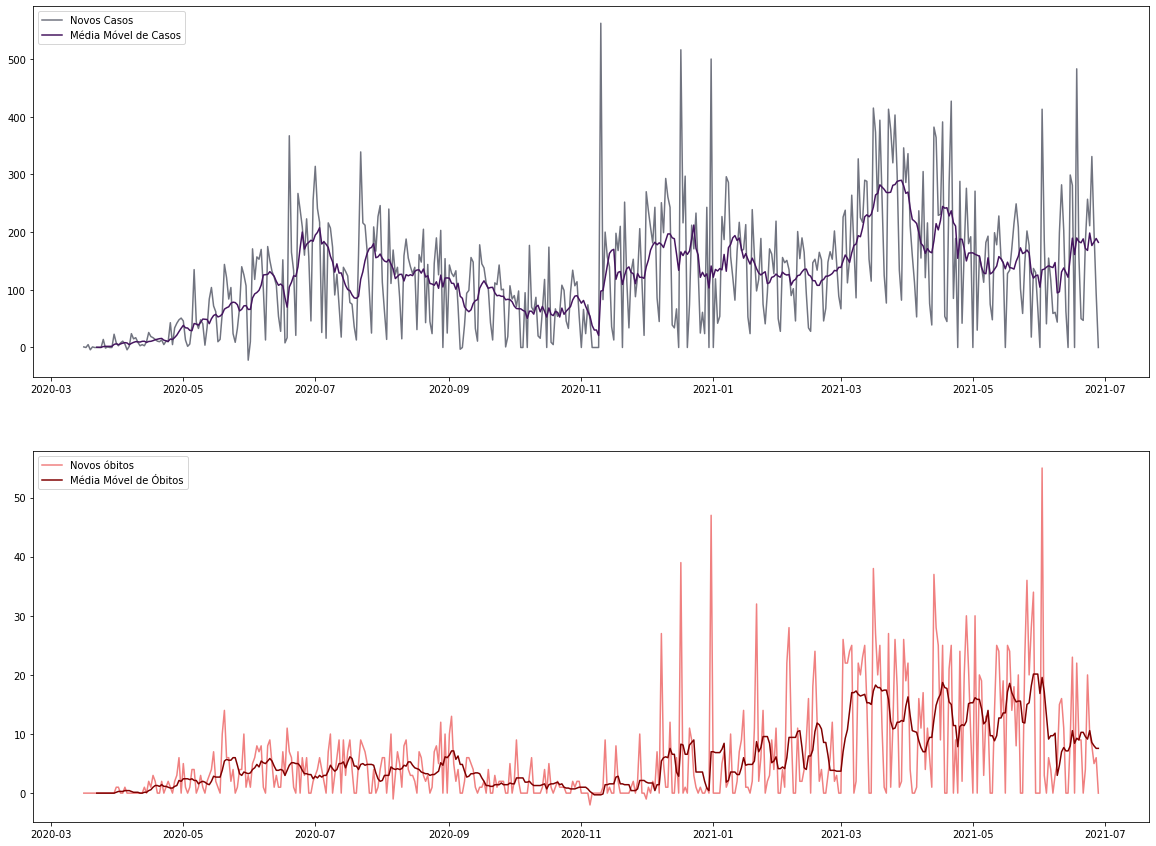

In [13]:
#criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(20,15))

#plotando a média móvel de casos
ax[0].plot(dados_sa['data'], dados_sa['casos_novos'], color='#717480', label='Novos Casos')
ax[0].plot(dados_sa['data'], dados_sa['media_movel_casos'], color='#45155f', label='Média Móvel de Casos')
ax[0].legend(loc='upper left')

#plotando a média móvel dos óbitos
ax[1].plot(dados_sa['data'], dados_sa['obitos_novos'], color='lightcoral', label='Novos óbitos')
ax[1].plot(dados_sa['data'], dados_sa['media_movel_obitos'], color='maroon', label='Média Móvel de Óbitos')
ax[1].legend(loc='upper left')

**Gráfico 5**: Média móvel para os casos e óbitos de Covid-19.

Observando os 2 gráficos é possível perceber uma relação entre os casos e óbitos. Quanto maior os número de casos, maior o número de óbitos.

É possível verificar essa relação entre as 2 variáveis através de um gráfico de correlação, como veremos abaixo.

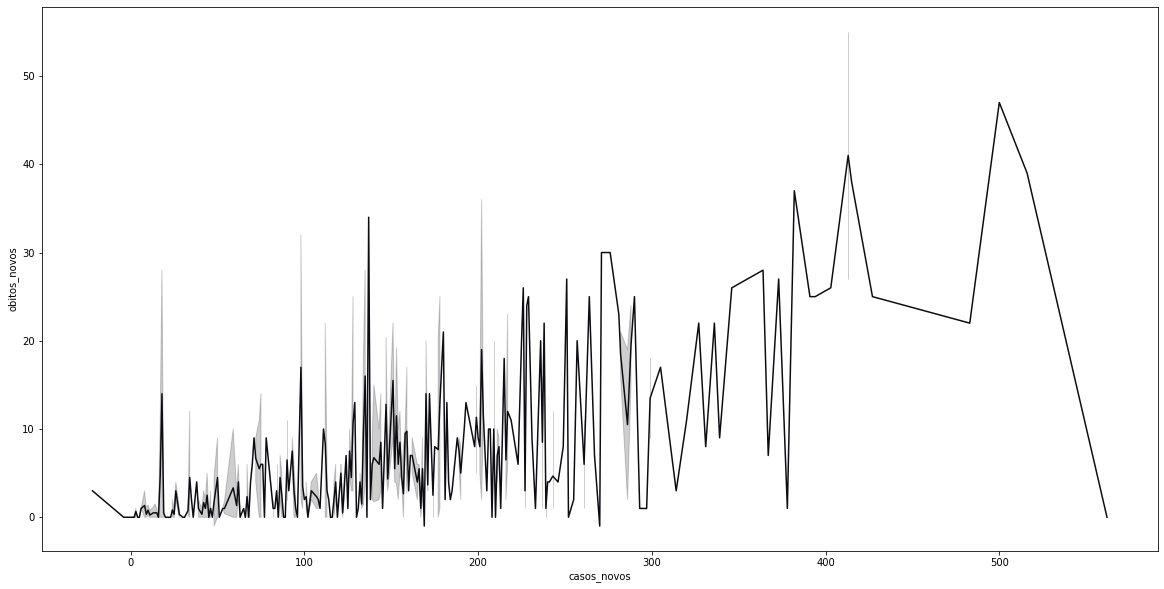

In [14]:
# criando a figura e os eixos
fig, ax = plt.subplots(figsize=(20, 10))

#plotando o gráfico da correlação entre o número de casos e óbitos novos de Covid-19
sns.lineplot(data=dados_sa, x='casos_novos', y='obitos_novos', color='#0c0c12')

**Figura 6**: Correlação entre o número de novos casos e óbitos confirmado de Covid-19 para a cidade de Santo Andre / SP.

No gráfico acima é possível perceber que conforme o número de casos aumentam o número de óbitos também aumenta. Gerando assim uma correlação, já imaginada, entre o número de casos e os óbitos.

A base de dados analisa contém informações do número de casos de Covid-19. Será que a informação sobre esses casos segue alguma sazonalidade? Esses dados informados segue um padrão para todos os dias ou existe uma diferença entre eles? Vamos verificar abaixo.

<BarContainer object of 31 artists>

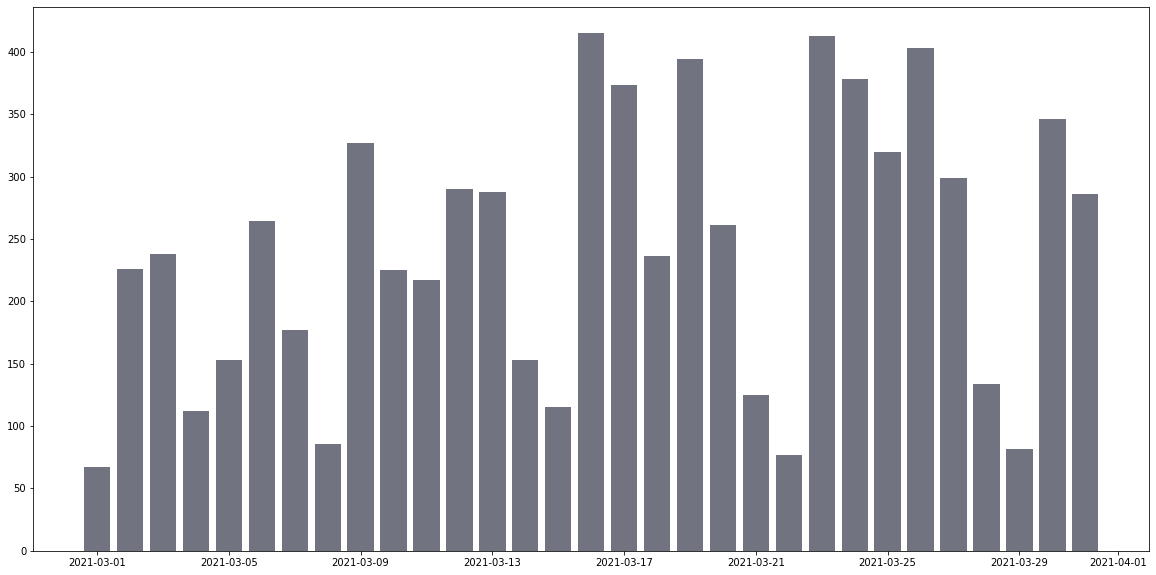

In [25]:
# separando os dados de 2021 em nossa base de dados
dados_sa['ano'] = dados_sa['data'].dt.year
dados_sa['mes'] = dados_sa['data'].dt.month

# separando os dados referentes a 2021
dados_mar_2021 = dados_sa.query("ano == 2021 and mes == 3")

# plotando o gráfico com os dados de 2021 para novos casos
fig, ax = plt.subplots(figsize = (20, 10))
#sns.barplot(data=dados_mar_2021, x='data', y = 'casos_novos', color='#717480')
plt.bar(dados_mar_2021['data'], dados_mar_2021['casos_novos'], color='#717480')

**Figura 7**: Gráfico com o número de casos novos diários para o mês de março de 2021.

No gráfico acima podemos ver que ao longo do tempo o padrão de novos casos de Covid-19 informados se repete. Temos 5 dias com um alto número de novos casos seguidos por 2 dias em que esse número diminui, fechando assim o ciclo de uma semana (7 dias). Isso pode indicar uma sazonalidade semanal em nossos dados.

Para confirmar essa sazonalidade podemos plotar um gráfico de autocorrelação através do próprio Pandas.

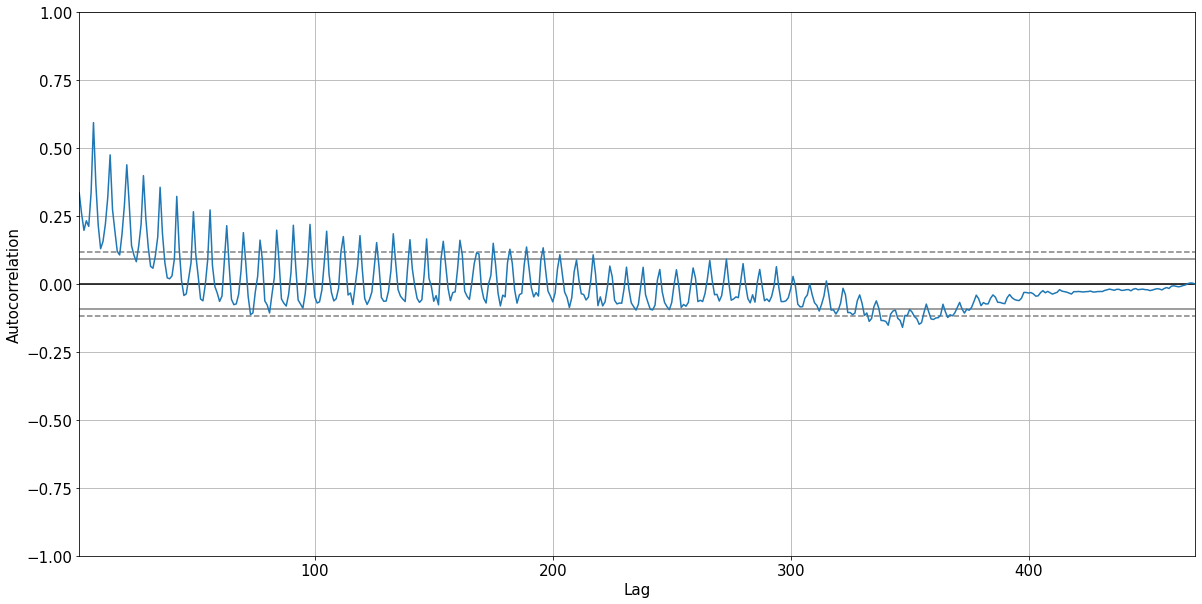

In [45]:
# importando módulo do Pandas que será utilizado
from pandas.plotting import autocorrelation_plot

# importando o matplotlib para manipular a imagem
import matplotlib as mpl

# definindo o tamanho da imagem e fonte a ser gerada
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['font.size'] = 15

# gerando o gráfico para verificar a autocorrelação dos dados de novos casos
autocorrelation_plot(dados_sa['casos_novos'])

**Figura 8**: Gráfico de autocorrelação dos casos de Covid-19

Na esquerda do gráfico podemos notar uma correlação acima de 0.5 dos nossos dados com aquele momento no tempo. Movendo nossos dados através do tempo vemos que essa correlação diminui, chegando próximo a 0 a direita do gráfico.

Como temos dados que são relacionáveis com o tempo, temos uma Série Temporal. Assim é possível identificar tendências e talvez realizar uma previsão com base nos padrões identificados.

Utilizando a biblioteca Prophet do Facebook buscaremos a criação de um modelo que consiga prever os dados de casos e óbitos de Covid-19. Isso será realizado [AQUI](www.criarlink.com).